In [687]:
import pandas as pd
import glob
import os
import datetime
import numpy as np

Plan:
 - read in specs into a single dataframe
 - read in timeseries
    - into one dataframe?
    - 'telemetered_net_output' and 'hsl'

In [695]:
folder = 'output_specs' 
filelist = glob.glob(os.path.join(folder , '*_specs.csv'))

In [ ]:
df = pd.concat((pd.read_csv(f) for f in filelist), ignore_index=True)

# replace empty strings with NaN
df = df.replace(' ', np.nan)

df

C:\Users\willh\AppData\Local\Temp\ipykernel_66180\1087592922.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(' ', np.nan)


,cdr file unit name,cdr unit code,cdr file nameplate ac mw,cdr file county,eia plant name,eia county,eia nameplate ac,eia lat,eia lon,eia solar Utility ID,...,eia solar Thin-Film (CIGS)?,eia solar Thin-Film (Other)?,eia solar Other Materials?,eia solar Net Metering Agreement?,eia solar Net Metering DC Capacity (MW),eia solar Virtual Net Metering Agreement?,eia solar Virtual Net Metering DC Capacity (MW),eia solar Latitude,eia solar Longitude,eia solar plant_name_county
0,ANSON SOLAR U1,ANSON1_UNIT1,100.8,JONES,"ANSON Solar Center, LLC",Jones,200.0,32.811041,-99.917490,56201.0,...,NaN,NaN,NaN,N,NaN,N,NaN,32.811041,-99.917490,"ANSON Solar Center, LLC Jones"
1,ARAGORN SOLAR,ARAGORN_UNIT1,188.2,CULBERSON,Aragorn Solar Project,Culberson,187.2,31.719983,-104.442292,63101.0,...,NaN,NaN,NaN,N,NaN,N,NaN,31.719983,-104.442292,Aragorn Solar Project Culberson
2,AZURE SKY SOLAR U1,AZURE_SOLAR1,74.9,HASKELL,Azure Sky Solar,Haskell,225.0,33.021601,-99.614630,63571.0,...,NaN,NaN,NaN,N,NaN,N,NaN,33.021601,-99.614630,Azure Sky Solar Haskell
3,BLUEBELL SOLAR II 1 (CAPRICORN RIDGE 4),CAPRIDG4_BB2_PV1,100.0,STERLING,Bluebell Solar II,Sterling,115.0,31.888000,-100.825000,63116.0,...,NaN,NaN,NaN,N,NaN,N,NaN,31.888000,-100.825000,Bluebell Solar II Sterling
4,CASTLE GAP SOLAR,CASL_GAP_UNIT1,180.0,UPTON,Castle Gap Solar Hybrid,Upton,180.0,31.255000,-102.272000,61123.0,...,NaN,NaN,NaN,N,NaN,N,NaN,31.255000,-102.272000,Castle Gap Solar Hybrid Upton
5,CONIGLIO SOLAR,CONIGLIO_UNIT1,125.7,FANNIN,Coniglio Solar,Fannin,123.6,33.404486,-96.082472,62680.0,...,NaN,NaN,NaN,N,NaN,N,NaN,33.404486,-96.082472,Coniglio Solar Fannin
6,EAST BLACKLAND SOLAR (PFLUGERVILLE SOLAR),E_BLACK_UNIT_1,144.0,TRAVIS,East Blackland Solar Project 1,Travis,144.0,30.421400,-97.461400,65411.0,...,NaN,NaN,NaN,N,NaN,N,NaN,30.421400,-97.461400,East Blackland Solar Project 1 Travis
7,ELARA SOLAR,ELARA_SL_UNIT1,132.4,FRIO,Elara Solar,Frio,132.4,28.883196,-99.178605,62842.0,...,NaN,NaN,NaN,N,NaN,N,NaN,28.883196,-99.178605,Elara Solar Frio
8,GALLOWAY 1 SOLAR,GALLOWAY_SOLAR1,250.0,CONCHO,Galloway 1 Solar Farm,Concho,250.0,31.435932,-99.796613,61523.0,...,NaN,NaN,NaN,N,NaN,N,NaN,31.435932,-99.796613,Galloway 1 Solar Farm Concho
9,GREASEWOOD SOLAR 1,GREASWOD_UNIT1,126.3,PECOS,Greasewood Solar,Pecos,255.0,31.030996,-102.488209,62705.0,...,NaN,NaN,NaN,N,NaN,N,NaN,31.030996,-102.488209,Greasewood Solar Pecos


Since EIA nameplates seem to be off (sometimes it includes multiple units, other times I'm not sure what's happening), let's normalize EIA AC and DC nameplate based on the ratio of EIA AC to CDR AC nameplates. 

In [703]:
ratios = df['cdr file nameplate ac mw'] / df['eia solar Nameplate Capacity (MW)']
df['eia nameplate ac'] = df['eia nameplate ac']*ratios
df['eia solar Nameplate Capacity (MW)'] = df['eia solar Nameplate Capacity (MW)'] * ratios
df['eia solar DC Net Capacity (MW)'] = df['eia solar DC Net Capacity (MW)'] * ratios

In [704]:
plant_number = 19
# select a row from dataframe and convert to dictionary
# plant_data = df.iloc[plant_number].dropna().to_dict()
plant_data = df.iloc[plant_number].to_dict()

# select keys that start with 'eia_solar'
prefix = 'eia solar'
plant_data = {key: val for key, val in plant_data.items()
       if key.startswith(prefix)}

# remove prefix
plant_data = {key.lstrip(prefix):value for key, value in plant_data.items()}
plant_data

{'Utility ID': 62161.0,
 'Utility Name': 'Cubico USA, LLC',
 'Plant Code': 63273.0,
 'Plant Name': 'Wagyu',
 'State': 'TX',
 'County': 'Brazoria',
 'Generator ID': 1215,
 'Status': 'OP',
 'Technology': 'Solar Photovoltaic',
 'Prime Mover': 'PV',
 'Sector Name': 'IPP Non-CHP',
 'Sector': 2.0,
 'Nameplate Capacity (MW)': 120.0,
 'Summer Capacity (MW)': 120.0,
 'Winter Capacity (MW)': 120.0,
 'Operating Month': 8.0,
 'Operating Year': 2020.0,
 'Lenses / Mirrors?': nan,
 'Single-Axis Tracking?': 'Y',
 'Dual-Axis Tracking?': nan,
 'Fixed Tilt?': nan,
 'Bifacial?': nan,
 'East West Fixed Tilt?': nan,
 'Parabolic Trough?': nan,
 'Linear Fresnel?': nan,
 'Power Tower?': nan,
 'Dish Engine?': nan,
 'Other Solar Technology?': nan,
 'Azimuth Angle': nan,
 'Tilt Angle': nan,
 'DC Net Capacity (MW)': 162.4,
 'Crystalline Silicon?': nan,
 'Thin-Film (CdTe)?': 'Y',
 'Thin-Film (A-Si)?': nan,
 'Thin-Film (CIGS)?': nan,
 'Thin-Film (Other)?': nan,
 'Other Materials?': nan,
 'Net Metering Agreement?': '

Sample: convert from solcast convention to pv_model convention:

```python
columns_map = {
    'latitude': 'latitude',
    'longitude': 'longitude',
    'capacity': 'nameplate_ac',
    'capacity_dc': 'nameplate_dc',
    'tracking_type': 'mount_type', # {'horizontal_single_axis':'single-axis','fixed':'fixed'}
    'install_date': 'install_date', # not used, needs to be used to calc degredation to be added to 'dc_loss_fraction'
    'module_type': 'cell_type', # solcast options are 'poly-si', 'mono-si', 'cdte', model_pv_power options are currently 'thin-film_cdte' (used for spectral correction) and 'crystalline' (unused)
    'derating_temp_module': 'gamma_pdc',
    'derating_age_system': 'derating_age_system', # not used, needs to be used to calc degredation to be added to 'dc_loss_fraction'
    'derating_other_system': 'derating_other_system', # not used directly, use to calculate 'dc_loss_fraction'
    'ground_coverage_ratio': 'gcr',
    'inverter_peak_efficiency': 'eta_inv_nom',
    'tracker_axis_azimuth': 'axis_azimuth', # North is 0, South is ±180, Eastward facing is negative values. Westward facing is positive values. For example, -90 is due east.'
    'tracker_max_rotation_angle': 'max_tracker_angle',
    'tracker_back_tracking': 'backtrack',
    'tracker_smart_tracking': 'tracker_smart_tracking', # not used
    'terrain_slope': 'terrain_slope', # needs to be used in pvlib.tracking.calc_cross_axis_tilt
    'terrain_azimuth': 'terrain_azimuth', # convert to proper azimuth convention, then use in pvlib.tracking.calc_cross_axis_tilt
    'dust_soiling_average': 'dust_soiling_average', # not used, needs to be added to 'dc_loss_fraction'
    'bifacial_system': 'bifacial',
    'site_ground_albedo': 'site_ground_albedo', # not used, possibly add to resource_data???
    'bifaciality_factor': 'bifaciality',
    'pvrow_height': 'row_height_center',
    'pvrow_width': 'collector_width',
    'confirmed_metadata': 'confirmed_metadata', # not used
    'azimuth': 'fixed_azimuth', # convert to proper azimuth convention
    'tilt': 'fixed_tilt',
    'grid_export_limit': 'grid_export_limit', # not used directly, should set nameplate_ac if it's lower than nameplate_ac
}

# rename columns
df.rename(columns=columns_map, inplace=True) 

# convert aximuths to proper azimuth convention
df['axis_azimuth'] = -df['axis_azimuth'] % 360
df['fixed_azimuth'] = -df['fixed_azimuth'] % 360
df['terrain_azimuth'] = -df['terrain_azimuth'] % 360

# rename mount and cell types
df['mount_type'] = df['mount_type'].map({'horizontal_single_axis':'single-axis','fixed':'fixed'})
df['cell_type'] = df['cell_type'].map({'cdte':'thin-film_cdte','poly-si':'crystalline', 'mono-si':'crystalline'})

# collapse monthly soiling to annual average for each site
df['dust_soiling_average'] = np.mean(df['dust_soiling_average'].to_list(), axis=1)

# calculate dc_loss_fraction by combining degradation, soiling, and other derate
years_oper = df.apply(lambda x: (pd.Timestamp.now(tz='UTC') - pd.to_datetime(x['install_date'])).days / 365.25, axis=1)
degr_loss = years_oper * df['derating_age_system']
df['dc_loss_fraction'] = 1- ((1-degr_loss) * (1-df['derating_other_system']) * (1-df['dust_soiling_average']))

# shade loss considerations. Use linear for cdte, for crystalline we don't have info about twin cells/modules,
# so assume twin (half-cut) after a given date
df['shade_loss_model'] = df['cell_type'].map({'thin-film_cdte': 'linear', 'crystalline': 'non-linear_simple'})
twin_cell_start_date = '2020-01-01' # TODO: needs to be verified, maybe in ITRPV 2020 or 2021?
df.loc[(df['install_date'] >= twin_cell_start_date) & (df['cell_type']=='crystalline'), 'shade_loss_model'] = 'non-linear_simple_twin_module'

# misc adjustments
df['nameplate_ac'] = df.apply(lambda x: min(x['nameplate_ac'], x['grid_export_limit']), axis=1) # cap ac output
df['axis_tilt'] = 0 # solcast does not have this as a parameter, so assume it's zero
df['cross_axis_slope'] = df.apply(lambda x:
                                  pvlib.tracking.calc_cross_axis_tilt(
                                      slope_azimuth = x['terrain_azimuth'],
                                      slope_tilt = x['terrain_slope'],
                                      axis_azimuth = x['axis_azimuth'],
                                      axis_tilt = x['axis_tilt'],
                                      ), axis=1)
df['slope_aware_backtracking'] = True
df['row_side_num_mods'] = 1 # default to 1 module along the side of a row (e.g., 1P)
df.loc[(df['mount_type'] == 'fixed'), 'row_side_num_mods'] = 2 # assume fixed tilt is 2P
```

In [705]:
plant_data

{'Utility ID': 62161.0,
 'Utility Name': 'Cubico USA, LLC',
 'Plant Code': 63273.0,
 'Plant Name': 'Wagyu',
 'State': 'TX',
 'County': 'Brazoria',
 'Generator ID': 1215,
 'Status': 'OP',
 'Technology': 'Solar Photovoltaic',
 'Prime Mover': 'PV',
 'Sector Name': 'IPP Non-CHP',
 'Sector': 2.0,
 'Nameplate Capacity (MW)': 120.0,
 'Summer Capacity (MW)': 120.0,
 'Winter Capacity (MW)': 120.0,
 'Operating Month': 8.0,
 'Operating Year': 2020.0,
 'Lenses / Mirrors?': nan,
 'Single-Axis Tracking?': 'Y',
 'Dual-Axis Tracking?': nan,
 'Fixed Tilt?': nan,
 'Bifacial?': nan,
 'East West Fixed Tilt?': nan,
 'Parabolic Trough?': nan,
 'Linear Fresnel?': nan,
 'Power Tower?': nan,
 'Dish Engine?': nan,
 'Other Solar Technology?': nan,
 'Azimuth Angle': nan,
 'Tilt Angle': nan,
 'DC Net Capacity (MW)': 162.4,
 'Crystalline Silicon?': nan,
 'Thin-Film (CdTe)?': 'Y',
 'Thin-Film (A-Si)?': nan,
 'Thin-Film (CIGS)?': nan,
 'Thin-Film (Other)?': nan,
 'Other Materials?': nan,
 'Net Metering Agreement?': '

Metadata assumptions (similar to [1], but modified slightly):
- `gamma_pdc`: if crystalline, -0.0035%/deg C, if thin-film, -0.0025%/deg C
- `axis_tilt`, `axis_azimuth`, `rotation_angle`: if mount_type is single-axis, 0, 180, 60, respectively
- `backtracking`: if single-axis and thin-film, `False`, else, `True`
- `ground_coverage_ratio`: fixed, 0.55; single-axis with thin-film, 0.4; single-axis with crystalline, 0.35
- twin modules (half-cut cells): if crystalline and COD after a certain date (2020-01-01), assume twin modules and use `shade_loss_model = 'non-linear_simple_twin_module'`, else if crystalline and COD efore that date, use `shade_loss_model = 'non-linear_simple'`


[1] Hobbs, William B. "Making Regional Probabilistic Solar Forecasts from Deterministic Forecasts with Open-Source Tools and Data." 2024 IEEE 52nd Photovoltaic Specialist Conference (PVSC). IEEE, 2024. https://doi.org/10.1109/PVSC57443.2024.10748736, preprint: https://doi.org/10.36227/techrxiv.172114760.07962823/v1 

In [706]:
plant_data['Azimuth Angle']

nan

In [707]:
# def eia_specs_to_pv_model_params():

# basics
latitude = plant_data['Latitude']
longitude = plant_data['Longitude']
nameplate_dc = plant_data['DC Net Capacity (MW)']
nameplate_ac = plant_data['Nameplate Capacity (MW)']

# commercial operation date
cod = datetime.datetime(
    int(plant_data['Operating Year']),
    int(plant_data['Operating Month']),
    1, # assume first day of the month
    ) 

# mounting type
if plant_data['Single-Axis Tracking?'] == 'Y':
    mount_type = 'single-axis'
elif plant_data['Fixed Tilt?'] == 'Y':
    mount_type = 'fixed'
else:
    raise ValueError('plant does not appear to be fixed or single-axis')

# shade loss.  Use linear for cdte, for crystalline we don't have info about twin cells/modules,
# so assume twin (half-cut) after a given date
twin_module_start_date = pd.to_datetime('2020-01-01') # TODO: needs to be verified, maybe in ITRPV 2020 or 2021?
if plant_data['Thin-Film (CdTe)?'] == 'Y':
    shade_loss_model = 'linear'
    cell_type = 'thin-film_cdte' # for spectral correction
elif (
    plant_data['Thin-Film (A-Si)?'] == 'Y' or
    plant_data['Thin-Film (CIGS)?'] == 'Y' or
    plant_data[ 'Thin-Film (Other)?'] == 'Y'
):
   shade_loss_model = 'linear'
elif plant_data['Crystalline Silicon?'] == 'Y':
    cell_type = 'crystalline'
    if cod > twin_module_start_date:
        shade_loss_model = 'non-linear_simple_twin_module'
        n_cells_up = 24
    else:
        shade_loss_model = 'non-linear_simple'
        n_cells_up = 12
    
# bifacial
if plant_data['Bifacial?'] == 'Y':
    bifacial = True
    bifaciality_factor = 0.8 # TODO: consider changing this based on COD
else:
    bifacial = False
    bifaciality_factor = pd.NA

# backtracking
if (
    mount_type == 'single-axis' and
    shade_loss_model == 'linear'
):
    backtrack = False
else:
    backtrack = True

# gcr 
if mount_type == 'fixed':
    gcr = 0.55
elif mount_type == 'single-axis' and cell_type == 'crystalline':
    gcr = 0.35
elif mount_type == 'single-axis':
    gcr = 0.40

# modules up each row 
if mount_type == 'fixed' and cell_type == 'crystalline':
    row_side_num_mods = 2
else:
    # assume crystalline trackers are 1P,
    # doesn't matter for linear shade loss configurations
    row_side_num_mods = 1

# tilt and azimuth
if mount_type == 'fixed':
    # assume tilt and azimuth are correct for fixed systems
    fixed_azimuth = plant_data['Azimuth Angle']
    fixed_tilt = plant_data['Tilt Angle']
    axis_azimuth = pd.NA
    axis_tilt = pd.NA
elif mount_type == 'single-axis':
    # sometimes EIA has the wrong azimuth for trackers, e.g., they enter tilt
    if plant_data['Azimuth Angle'] > 90 and plant_data['Azimuth Angle'] < 270:
        axis_azimuth = plant_data['Azimuth Angle']
    else:
        axis_azimuth = 180
    # sometimes EIA has the wrong tilt for trackers, e.g., they enter max rotation angle
    if isinstance(plant_data['Tilt Angle'],str):
        axis_tilt = 0
    elif plant_data['Tilt Angle'] < 15:
        axis_tilt = plant_data['Tilt Angle']
    else:
        axis_tilt = 0
    fixed_azimuth = pd.NA
    fixed_tilt = pd.NA

# temperature coefficient
# TODO: consider changing this based on COD
if cell_type == 'crystalline':
    gamma_pdc = -0.0035
else:
    gamma_pdc = -0.0025

# dc derate
dc_loss_fraction_base = 0.15
annual_degradation = 0.005 # assume 0.5%/yr PLR
years_oper = (pd.Timestamp.now() - cod).days / 365.25 # TODO: make this based analysis time, not time right now
degr_loss = years_oper * annual_degradation
dc_loss_fraction = 1 - ((1 - dc_loss_fraction_base) * (1 - degr_loss))

In [708]:
plant_data_new = {
    'latitude': latitude,
    'longitude': longitude,
    'nameplate_dc': nameplate_dc,
    'nameplate_ac': nameplate_ac,
    'mount_type': mount_type,
    'cell_type': cell_type,
    'shade_loss_model': shade_loss_model,
    'bifacial': bifacial,
    'bifaciality_factor': bifaciality_factor,
    'backtrack': backtrack,
    'gcr': gcr,
    'row_side_num_mods': row_side_num_mods,
    'fixed_azimuth': fixed_azimuth,
    'fixed_tilt': fixed_tilt,
    'axis_azimuth': axis_azimuth,
    'axis_tilt': axis_tilt,
    'gamma_pdc': gamma_pdc,
    'dc_loss_fraction': dc_loss_fraction,
}

In [709]:
plant_data_new

{'latitude': 29.242304,
 'longitude': -95.658144,
 'nameplate_dc': 162.4,
 'nameplate_ac': 120.0,
 'mount_type': 'single-axis',
 'cell_type': 'thin-film_cdte',
 'shade_loss_model': 'linear',
 'bifacial': False,
 'bifaciality_factor': <NA>,
 'backtrack': False,
 'gcr': 0.4,
 'row_side_num_mods': 1,
 'fixed_azimuth': <NA>,
 'fixed_tilt': <NA>,
 'axis_azimuth': 180,
 'axis_tilt': 0,
 'gamma_pdc': -0.0025,
 'dc_loss_fraction': 0.1702696783025326}

In [636]:
plant_data_new = {
    **plant_data_new,
    # 'bifacial': False,
}

In [637]:
import pvlib
from pv_model import model_pv_power
import matplotlib.pyplot as plt

In [638]:
## API key credentials are stored in a separate text file
with open('nrel_api_key_details.txt') as f: # full path and filename of text file with api key on first line
    email = f.readline().rstrip()  # rstrip removes trailing line breaks and spaces
    api_key = f.readline().rstrip() 

In [639]:
year = 2023

In [625]:
resource, metadata = pvlib.iotools.get_nsrdb_psm4_conus(
    plant_data_new['latitude'],
    plant_data_new['longitude'],
    api_key,
    email,
    year,
    time_step=15,
    utc=True)

In [640]:
power_expected, _ = model_pv_power(resource, **plant_data_new)

pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.


In [641]:
plant_data_new

{'latitude': 33.021601,
 'longitude': -99.61463,
 'nameplate_dc': 94.50715555555556,
 'nameplate_ac': 74.9,
 'mount_type': 'single-axis',
 'cell_type': 'crystalline',
 'shade_loss_model': 'non-linear_simple_twin_module',
 'bifacial': True,
 'bifaciality_factor': 0.8,
 'backtrack': True,
 'gcr': 0.35,
 'row_side_num_mods': 1,
 'fixed_azimuth': <NA>,
 'fixed_tilt': <NA>,
 'axis_azimuth': 180,
 'axis_tilt': 0,
 'gamma_pdc': -0.0035,
 'dc_loss_fraction': 0.16634839151266256}

<Axes: >

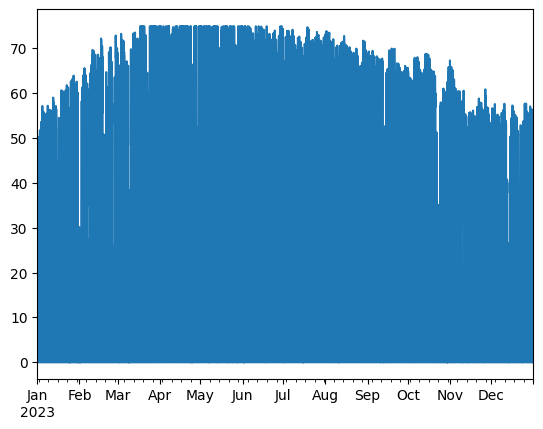

In [642]:
power_expected.plot()

In [643]:
folder_ts = 'output_timeseries' 
filelist_ts = glob.glob(os.path.join(folder_ts, '*20240101.csv'))

In [644]:
filelist_ts[plant_number]

'output_timeseries\\AZURE_SKY_SOLAR_U1_actual_power_20230101-20240101.csv'

In [645]:
# ts_file = 'output_timeseries\ANSON_SOLAR_U1_actual_power_20230101-20240101.csv'
# ts_file = 'output_timeseries\ARAGORN_SOLAR_actual_power_20230101-20240101.csv'
ts_file = filelist_ts[plant_number]
df_ts = pd.read_csv(ts_file,index_col=0,parse_dates=True)

C:\Users\willh\AppData\Local\Temp\ipykernel_66180\1480831051.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ts = pd.read_csv(ts_file,index_col=0,parse_dates=True)


<Axes: xlabel='interval_start_utc'>

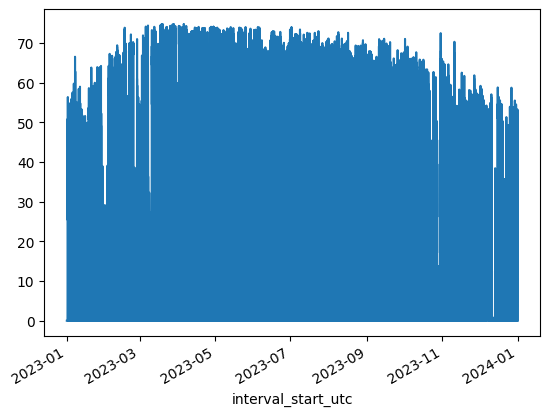

In [646]:
df_ts['telemetered_net_output'].plot()

<Axes: xlabel='interval_start_utc'>

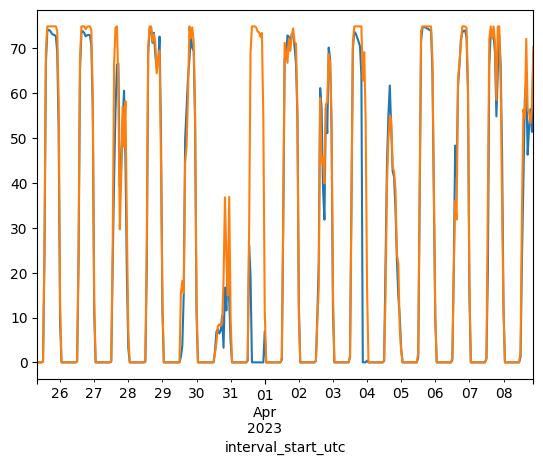

In [647]:
start = 2000
end = 2350
df_ts['telemetered_net_output'].resample('1h').mean()[start:end].plot()
(power_expected).resample('1h').mean()[start:end].plot()

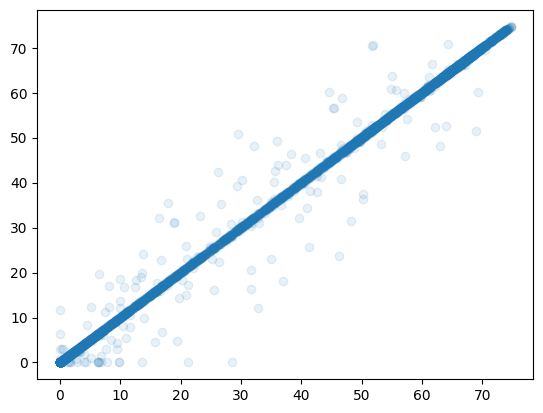

In [648]:
plt.scatter(
    # df['hsl'].resample('1h').mean(),
    df_ts['telemetered_net_output'].resample('1h').mean(),
    df_ts['base_point'].resample('1h').mean(),
    # (power_expected).resample('1h').mean(),
    alpha=0.1)

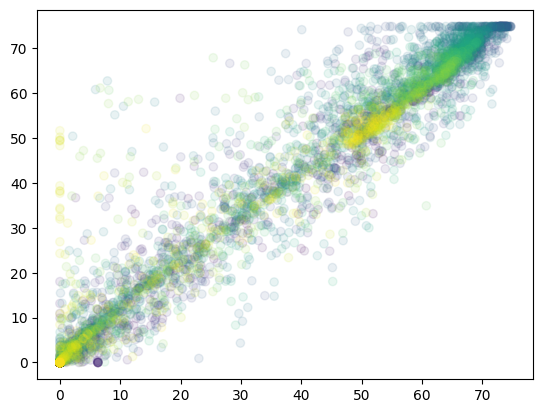

In [649]:
plt.scatter(
    # df['hsl'].resample('1h').mean(),
    # df['telemetered_net_output'].resample('1h').mean(),
    df_ts['hsl'].resample('1h').mean(),
    (power_expected).resample('1h').mean(),
    c=df_ts['base_point'].resample('1h').mean().index,
    alpha=0.1)

In [650]:
import scipy

In [651]:
def dc_loss_error(dc_loss_fraction, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'dc_loss_fraction': dc_loss_fraction,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)

    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

def gamma_pdc_error(gamma_pdc, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'gamma_pdc': gamma_pdc,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)
    
    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

def gcr_error(gcr, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'gcr': gcr,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)
    
    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

def axis_azimuth_error(axis_azimuth, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'axis_azimuth': axis_azimuth,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)
    
    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

def fixed_azimuth_error(fixed_azimuth, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'fixed_azimuth': fixed_azimuth,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)
    
    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

def axis_tilt_error(axis_tilt, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'axis_tilt': axis_tilt,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)
    
    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

def fixed_tilt_error(fixed_tilt, combined_variables):
    power_actual = combined_variables[0]
    resource = combined_variables[1]
    plant_data_new = combined_variables[2]
    plant_data_new = {
        **plant_data_new,
        'fixed_tilt': fixed_tilt,
    }
    power_expected, _ = model_pv_power(resource, **plant_data_new)
    
    # filter small values, resample to hourly, calculate abs error
    thresh = power_actual.max() * .05
    power_actual = power_actual.resample('1h').mean()
    power_expected = power_expected.resample('1h').mean()
    abs_err = (power_expected[power_actual > thresh] - power_actual[power_actual > thresh]).abs().sum()
    return abs_err

In [679]:
plant_data_opt = plant_data_new
plant_data_opt

{'latitude': 33.021601,
 'longitude': -99.61463,
 'nameplate_dc': 94.50715555555556,
 'nameplate_ac': 74.9,
 'mount_type': 'single-axis',
 'cell_type': 'crystalline',
 'shade_loss_model': 'non-linear_simple_twin_module',
 'bifacial': True,
 'bifaciality_factor': 0.8,
 'backtrack': True,
 'gcr': 0.35,
 'row_side_num_mods': 1,
 'fixed_azimuth': <NA>,
 'fixed_tilt': <NA>,
 'axis_azimuth': 180,
 'axis_tilt': 0,
 'gamma_pdc': -0.0035,
 'dc_loss_fraction': 0.16634839151266256}

In [680]:
combined_variables = {}
combined_variables[0]=df_ts['hsl']
# combined_variables[0]=df_ts['telemetered_net_output']
combined_variables[1]=resource
combined_variables[2]=plant_data_opt

In [681]:
# tracking w/ bifacial is about 30x slower, likely due to infinite sheds
# so, lets' resample to hours (4x savings) and use the first quarter of the dataset (4x, combined 16x savings)
if plant_data_opt['bifacial'] == True and plant_data_opt['mount_type'] == 'single-axis':
    combined_variables[0] = combined_variables[0].resample('1h').mean()
    combined_variables[1] = combined_variables[1].resample('1h').mean()
    combined_variables[0] = combined_variables[0][:len(combined_variables[0]) // 4].copy()
    combined_variables[1] = combined_variables[1][:len(combined_variables[1]) // 4].copy()



DC loss, then gcr, then gamma_pdc, then axis_azimuth (if it's tracking) or fixed_azimuth (if it's fixed), then tilt:

In [682]:
out = scipy.optimize.minimize(dc_loss_error, plant_data_opt['dc_loss_fraction'], combined_variables, bounds=[(-.1,.95)], method = "Nelder-Mead")
print(plant_data_opt['dc_loss_fraction'])
plant_data_opt = {
    **plant_data_opt,
    'dc_loss_fraction': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not current

In [683]:
out = scipy.optimize.minimize(gcr_error, plant_data_opt['gcr'], combined_variables, bounds=[(.1,.8)], method = "Nelder-Mead")
print(plant_data_opt['gcr'])
plant_data_opt = {
    **plant_data_opt,
    'gcr': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not current

In [ ]:
out = scipy.optimize.minimize(gamma_pdc_error, plant_data_opt['gamma_pdc'], combined_variables, bounds=[(-.008, -.0005)], method = "Nelder-Mead")
print(plant_data_opt['gamma_pdc'])
plant_data_opt = {
    **plant_data_opt,
    'gamma_pdc': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not current

In [685]:
if plant_data_opt['mount_type'] == 'single-axis':
    out = scipy.optimize.minimize(axis_azimuth_error, plant_data_opt['axis_azimuth'], combined_variables, bounds=[(90.0,270.0)], method = "Nelder-Mead")
    print(plant_data_opt['axis_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(axis_tilt_error, plant_data_opt['axis_tilt'], combined_variables, bounds=[(-5,20)], method = "Nelder-Mead")
    print(plant_data_opt['axis_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

elif plant_data_opt['mount_type'] == 'fixed':
    out = scipy.optimize.minimize(fixed_azimuth_error, plant_data_opt['fixed_azimuth'], combined_variables, bounds=[(90,270)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(fixed_tilt_error, plant_data_opt['fixed_tilt'], combined_variables, bounds=[(0,60)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not currently accept the perez-driesse model.
using haydavies instead.
pvlib.bifacial.infinite_sheds does not current

KeyboardInterrupt: 

Repeat

In [527]:
out = scipy.optimize.minimize(dc_loss_error, plant_data_opt['dc_loss_fraction'], combined_variables, bounds=[(-.1,.95)], method = "Nelder-Mead")
print(plant_data_opt['dc_loss_fraction'])
plant_data_opt = {
    **plant_data_opt,
    'dc_loss_fraction': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

0.2556992987599463
Optimization terminated successfully.
0.2583235563946194


In [528]:
out = scipy.optimize.minimize(gcr_error, plant_data_opt['gcr'], combined_variables, bounds=[(.1,.8)], method = "Nelder-Mead")
print(plant_data_opt['gcr'])
plant_data_opt = {
    **plant_data_opt,
    'gcr': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

0.37312500000000004
Optimization terminated successfully.
0.3688162078857422


In [529]:
out = scipy.optimize.minimize(gamma_pdc_error, plant_data_opt['gamma_pdc'], combined_variables, bounds=[(-.008, -.0005)], method = "Nelder-Mead")
print(plant_data_opt['gamma_pdc'])
plant_data_opt = {
    **plant_data_opt,
    'gamma_pdc': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

-0.0024777832031249994
Optimization terminated successfully.
-0.002381236767768859


In [530]:
if plant_data_opt['mount_type'] == 'single-axis':
    out = scipy.optimize.minimize(axis_azimuth_error, 185, combined_variables, bounds=[(90.0,270.0)], method = "Nelder-Mead")
    print(plant_data_opt['axis_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(axis_tilt_error, plant_data_opt['axis_tilt'], combined_variables, bounds=[(-5,20)], method = "Nelder-Mead")
    print(plant_data_opt['axis_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

elif plant_data_opt['mount_type'] == 'fixed':
    out = scipy.optimize.minimize(fixed_azimuth_error, plant_data_opt['fixed_azimuth'], combined_variables, bounds=[(90,270)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(fixed_tilt_error, plant_data_opt['fixed_tilt'], combined_variables, bounds=[(0,60)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

177.32544708251953
Optimization terminated successfully.
177.37512969970703
0.0
Optimization terminated successfully.
-0.06325000000000001


In [534]:
power_expected_opt, _ = model_pv_power(resource, **plant_data_opt)

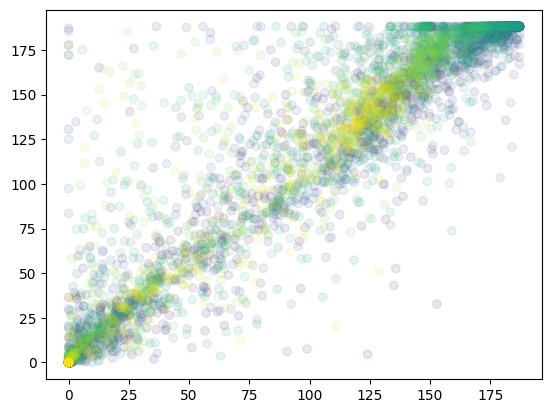

In [535]:
plt.scatter(
    # df_ts['telemetered_net_output'].resample('1h').mean(),
    df_ts['hsl'].resample('1h').mean(),
    (power_expected).resample('1h').mean(),
    c=df_ts['base_point'].resample('1h').mean().index,
    alpha=0.1)

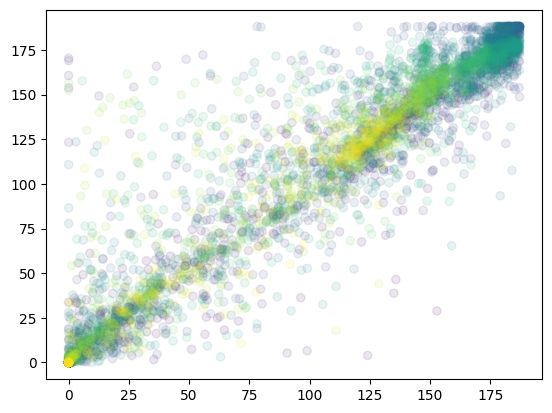

In [536]:
plt.scatter(
    # df_ts['telemetered_net_output'].resample('1h').mean(),
    df_ts['hsl'].resample('1h').mean(),
    power_expected_opt.resample('1h').mean(),
    c=df_ts['base_point'].resample('1h').mean().index,
    alpha=0.1)

## Repeat it all with a shorter time range:

In [605]:
plant_data_opt = plant_data_new
plant_data_opt

{'latitude': 31.719983,
 'longitude': -104.442292,
 'nameplate_dc': 256.3621794871795,
 'nameplate_ac': 188.2,
 'mount_type': 'single-axis',
 'cell_type': 'thin-film_cdte',
 'shade_loss_model': 'linear',
 'bifacial': False,
 'bifaciality_factor': <NA>,
 'backtrack': False,
 'gcr': 0.4,
 'row_side_num_mods': 1,
 'fixed_azimuth': <NA>,
 'fixed_tilt': <NA>,
 'axis_azimuth': 180,
 'axis_tilt': 0,
 'gamma_pdc': -0.0025,
 'dc_loss_fraction': 0.1645681040383299}

In [606]:
start = '2023-07-01'
end = '2023-12-31'
combined_variables = {}
combined_variables[0]=df_ts['hsl'][(df_ts.index >= start) & (df_ts.index < end)].copy()
# combined_variables[0]=df_ts['telemetered_net_output']
combined_variables[1]=resource[(resource.index >= start) & (resource.index < end)].copy()
combined_variables[2]=plant_data_opt

DC loss, then gcr, then gamma_pdc, then axis_azimuth (if it's tracking) or fixed_azimuth (if it's fixed), then tilt:

In [607]:
out = scipy.optimize.minimize(dc_loss_error, plant_data_opt['dc_loss_fraction'], combined_variables, bounds=[(-.1,.95)], method = "Nelder-Mead")
print(plant_data_opt['dc_loss_fraction'])
plant_data_opt = {
    **plant_data_opt,
    'dc_loss_fraction': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

0.1645681040383299
Optimization terminated successfully.
0.2592188705162349


In [608]:
out = scipy.optimize.minimize(gcr_error, plant_data_opt['gcr'], combined_variables, bounds=[(.1,.8)], method = "Nelder-Mead")
print(plant_data_opt['gcr'])
plant_data_opt = {
    **plant_data_opt,
    'gcr': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

0.4
Optimization terminated successfully.
0.38283203125


In [609]:
out = scipy.optimize.minimize(gamma_pdc_error, plant_data_opt['gamma_pdc'], combined_variables, bounds=[(-.008, -.0005)], method = "Nelder-Mead")
print(plant_data_opt['gamma_pdc'])
plant_data_opt = {
    **plant_data_opt,
    'gamma_pdc': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

-0.0025
Optimization terminated successfully.
-0.0022856445312499996


In [610]:
if plant_data_opt['mount_type'] == 'single-axis':
    out = scipy.optimize.minimize(axis_azimuth_error, 185, combined_variables, bounds=[(90.0,270.0)], method = "Nelder-Mead")
    print(plant_data_opt['axis_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(axis_tilt_error, plant_data_opt['axis_tilt'], combined_variables, bounds=[(-5,20)], method = "Nelder-Mead")
    print(plant_data_opt['axis_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

elif plant_data_opt['mount_type'] == 'fixed':
    out = scipy.optimize.minimize(fixed_azimuth_error, plant_data_opt['fixed_azimuth'], combined_variables, bounds=[(90,270)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(fixed_tilt_error, plant_data_opt['fixed_tilt'], combined_variables, bounds=[(0,60)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

180
Optimization terminated successfully.
177.52015495300293
0
Optimization terminated successfully.
-4.8828125e-07


Repeat

In [611]:
out = scipy.optimize.minimize(dc_loss_error, plant_data_opt['dc_loss_fraction'], combined_variables, bounds=[(-.1,.95)], method = "Nelder-Mead")
print(plant_data_opt['dc_loss_fraction'])
plant_data_opt = {
    **plant_data_opt,
    'dc_loss_fraction': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

0.2592188705162349
Optimization terminated successfully.
0.2643869518183667


In [612]:
out = scipy.optimize.minimize(gcr_error, plant_data_opt['gcr'], combined_variables, bounds=[(.1,.8)], method = "Nelder-Mead")
print(plant_data_opt['gcr'])
plant_data_opt = {
    **plant_data_opt,
    'gcr': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

0.38283203125
Optimization terminated successfully.
0.3778182261288166


In [613]:
out = scipy.optimize.minimize(gamma_pdc_error, plant_data_opt['gamma_pdc'], combined_variables, bounds=[(-.008, -.0005)], method = "Nelder-Mead")
print(plant_data_opt['gamma_pdc'])
plant_data_opt = {
    **plant_data_opt,
    'gamma_pdc': out['x'][0],
}
combined_variables[2]=plant_data_opt

print(out['message'])
print(out['x'][0])

-0.0022856445312499996
Optimization terminated successfully.
-0.002057024276256561


In [614]:
if plant_data_opt['mount_type'] == 'single-axis':
    out = scipy.optimize.minimize(axis_azimuth_error, 185, combined_variables, bounds=[(90.0,270.0)], method = "Nelder-Mead")
    print(plant_data_opt['axis_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(axis_tilt_error, plant_data_opt['axis_tilt'], combined_variables, bounds=[(-5,20)], method = "Nelder-Mead")
    print(plant_data_opt['axis_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'axis_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

elif plant_data_opt['mount_type'] == 'fixed':
    out = scipy.optimize.minimize(fixed_azimuth_error, plant_data_opt['fixed_azimuth'], combined_variables, bounds=[(90,270)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_azimuth'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_azimuth': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

    out = scipy.optimize.minimize(fixed_tilt_error, plant_data_opt['fixed_tilt'], combined_variables, bounds=[(0,60)], method = "Nelder-Mead")
    print(plant_data_opt['fixed_tilt'])
    plant_data_opt = {
        **plant_data_opt,
        'fixed_tilt': out['x'][0],
    }
    combined_variables[2]=plant_data_opt

    print(out['message'])
    print(out['x'][0])

177.52015495300293
Optimization terminated successfully.
177.5124626159668
-4.8828125e-07
Optimization terminated successfully.
-5.126953125000001e-07


In [12]:

# gcr
# nameplate_dc
# nameplate_ac
# dc_loss_fraction
# gamma_pdc
# shade_loss_model
# default_site_transposition_model
# backtrack
# backtrack_fraction
# max_tracker_angle
# axis_tilt
# axis_azimuth
# fixed_tilt
# fixed_azimuth
# n_cells_up
# row_side_num_mods
# row_height_center
# row_pitch
# collector_width
# bifacial
# bifaciality_factor
# surface_tilt_timeseries
# surface_azimuth_timeseries
# use_measured_poa
# use_measured_temp_module
# cell_type
# eta_inv_nom
